In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')

In [2]:
import operator

In [3]:
summary = pd.read_excel('XYZ-1.xlsx', 'summary')
df = pd.read_excel('XYZ-1.xlsx', 'Data')
demand = df[6:]

In [4]:
summary

,Lead time,starting stock,Probability,Demand_lead
0,9,2750,1,705
1,6,22500,1,3891
2,16,5200,1,2266
3,22,1400,1,785


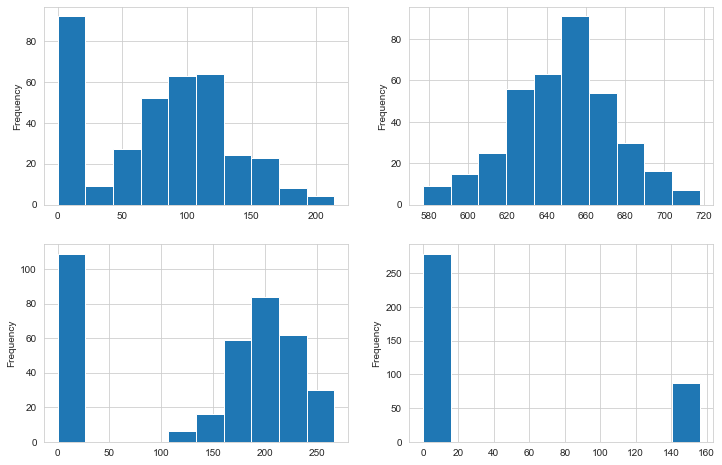

In [5]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
demand[1].plot.hist(ax=axes[0, 0])
demand[2].plot.hist(ax=axes[0, 1])
demand[3].plot.hist(ax=axes[1, 0])
demand[4].plot.hist(ax=axes[1, 1])

In [6]:
class Product:
    def __init__(self, i):
        """
        :type i: int - Product number
        """
        self.i = i
        self.lead_time = summary['Lead time'].iloc[i - 1]
        self.probability = summary['Probability'].iloc[i - 1]
        self.starting_stock = summary['starting stock'].iloc[i - 1]
        self.demand_lead = summary['Demand_lead'].iloc[i - 1]

        self.mean = np.mean([np.log(j) for j in demand[demand[i] > 0][i]])
        self.sd = np.std([np.log(j) for j in demand[demand[i] > 0][i]])

In [7]:
def daily_demand(mean, sd, probability):
    random_num = np.random.uniform(0, 1)
    if random_num > probability:
        return 0
    else:
        return np.exp(np.random.normal(mean, sd))

In [8]:
product_1 = Product(1)

In [9]:
def reple(M, product, review_period=30):
    inventory = product.starting_stock
    mean = product.mean
    sd = product.sd
    lead_time = product.lead_time
    probability = product.probability
    demand_lead = product.demand_lead

    q = 0
    stock_out = 0
    counter = 0
    order_placed = False
    # dictionary to store all the information
    data = {'inv_level': [], 'daily_demand': [], 'orders': [],'clossing' : []}

    for day in range(1, 365):
        day_demand = daily_demand(mean, sd, probability)
        data['daily_demand'].append(day_demand)

        if day % review_period == 0:
            # Placing the order
            q = M - inventory + demand_lead
            order_placed = True
            data['orders'].append(q)
            
            
        if order_placed:
            counter += 1
        
        if counter == lead_time:
            # Restocking day
            inventory += q
            order_placed = False
            counter = 0

        if inventory - day_demand >= 0:
            inventory -= day_demand
        elif inventory - day_demand < 0:
            inventory = 0
            stock_out += 1

        data['inv_level'].append(inventory)

    return data


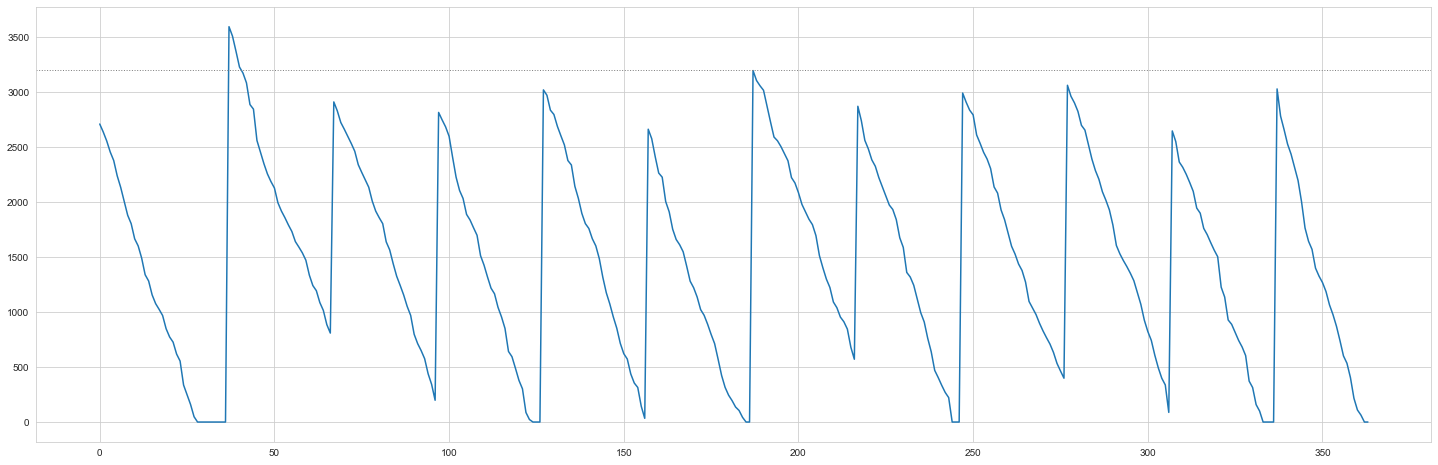

In [10]:
M=3000
data = reple(3000, product_1)
plt.figure(figsize=(25,8))
plt.plot(data['inv_level'])
plt.axhline(3200, linewidth=1, color="grey", linestyle=":")
plt.show()

In [11]:
print (data['inv_level'])

[2708.2555070952176, 2636.055590240002, 2554.288458187269, 2454.4233001125667, 2376.607844792776, 2237.526240452498, 2132.316439004159, 2005.4031708440302, 1879.1809615235377, 1802.465244151898, 1665.038187559162, 1600.6310177463915, 1489.7936862151437, 1338.4932376815173, 1281.4756009820999, 1155.4648110262738, 1076.1256357224383, 1023.7771943068303, 967.8301746221506, 848.0232467928149, 773.2503679638418, 725.8731390192489, 617.9572576480479, 554.2190000744343, 335.9962901884989, 246.60524497149012, 159.33116348834153, 48.20037408469793, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3592.7219599642854, 3506.9383588128626, 3369.4816199568822, 3226.148687222854, 3171.1835652918994, 3082.2811645425927, 2885.0663681496953, 2843.688870530777, 2558.921562789879, 2452.608092763111, 2347.30811766358, 2254.8092400694004, 2185.5717427616464, 2127.1206993464525, 1992.72784716442, 1917.5707889706778, 1857.3838704976254, 1791.2111174383808, 1731.3274428045315, 1639.718220492872, 1589.9838379856083, 1537.21479042585

In [12]:
print (data['orders'])

[3705, 2167.7852095741437, 2653.977742850121, 3111.548051063049, 2852.8182352759713, 3281.386628992667, 2406.740149236623, 3066.238099279807, 2728.0929822350613, 2634.9912480507937, 3101.0528504211784, 3301.652829475287]


In [13]:
print (data['daily_demand'])

[41.744492904782625, 72.19991685521558, 81.76713205273309, 99.86515807470234, 77.81545531979074, 139.08160434027843, 105.20980144833884, 126.91326816012857, 126.22220932049251, 76.71571737163968, 137.42705659273614, 64.40716981277052, 110.83733153124795, 151.30044853362648, 57.01763669941739, 126.01078995582607, 79.33917530383548, 52.348441415608036, 55.94701968467974, 119.80692782933572, 74.77287882897316, 47.377228944592844, 107.91588137120108, 63.73825757361352, 218.22270988593544, 89.39104521700878, 87.2740814831486, 111.1307894036436, 148.62277375885103, 130.25678465863191, 169.7880345375357, 86.28140975343764, 179.53739104450761, 118.06615761550263, 48.2351427047677, 90.4197982023249, 161.45749489475676, 112.27804003571444, 85.78360115142266, 137.45673885598052, 143.3329327340284, 54.96512193095442, 88.90240074930689, 197.21479639289745, 41.37749761891852, 284.7673077408981, 106.31347002676797, 105.29997509953076, 92.49887759417963, 69.23749730775404, 58.4510434151939, 134.392852

In [14]:
average=0
clossing = []
for i in range(364):
        average=average+data['daily_demand'][i]
        clossing.append(data['inv_level'][i]-data['daily_demand'][i])
average=average/365
ROP=average*product_1.lead_time

In [19]:
import csv

with open('predict.csv', 'w') as csvfile:
    filewriter = csv.writer(csvfile, delimiter=',',
                            quotechar='|', quoting=csv.QUOTE_MINIMAL)
    filewriter.writerow(['days','opening','clossing','ROP','smax', 'SL'])
    for i in range(364):   
        row_list=[[i+1,data['inv_level'][i],clossing[i],ROP ,M,average]]
        filewriter.writerows(row_list)